In [164]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [165]:
dataset=pd.read_csv('Algerian_forest_fire_cleanned_dataset.csv')

In [166]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [167]:
dataset['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [168]:
dataset['Classes']=dataset['Classes'].str.strip()

In [169]:
dataset['Classes'].value_counts()

Classes
fire        137
not fire    106
Name: count, dtype: int64

In [170]:
dataset['Classes']=dataset['Classes'].map({'fire':1,'not fire':0})

In [171]:
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0


In [172]:
dataset.isnull().sum()

day            0
month          0
year           0
Temperature    0
RH             0
Ws             0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [173]:
dataset.drop(['day','month','year'],axis=1,inplace=True)

In [174]:
dataset.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


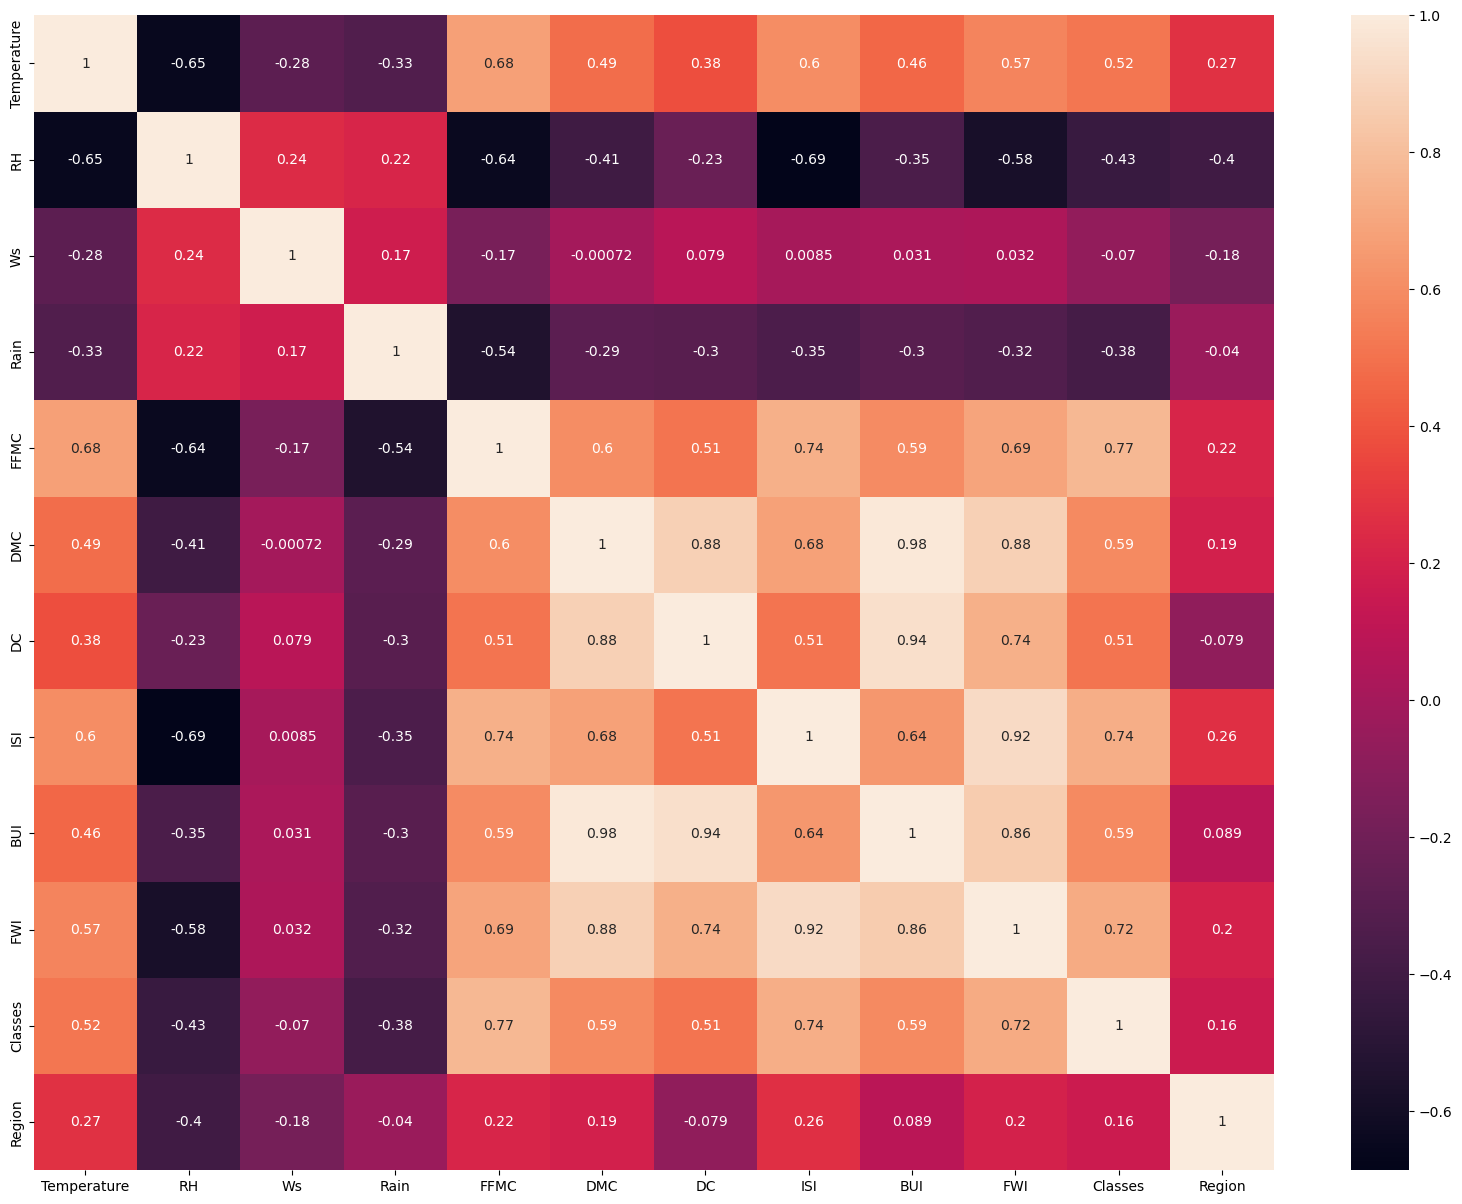

In [175]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True);


In [176]:
dataset.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI',
       'FWI', 'Classes', 'Region'],
      dtype='object')

In [177]:
X=dataset.drop('FWI',axis=1)
y=dataset['FWI']

In [178]:
X.shape,y.shape

((243, 11), (243,))

In [179]:
from sklearn.model_selection import train_test_split

In [180]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42,test_size=0.2)

In [181]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((194, 11), (49, 11), (194,), (49,))

In [182]:
def correlation(dataset,threshold):
    col_corr=set()
    corr_matrix=dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname=corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [183]:
core_feature=correlation(X_train,0.85)
print(core_feature)


{'BUI', 'DC'}


In [184]:
X_train.drop(core_feature,axis=1,inplace=True)
X_test.drop(core_feature,axis=1,inplace=True)

X_train.shape,X_test.shape

((194, 9), (49, 9))

In [185]:
### feature scalling and standarization

from sklearn.preprocessing import StandardScaler

In [186]:
scaler=StandardScaler()

X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [187]:
### Box plot to understand effect of Standard Scaler

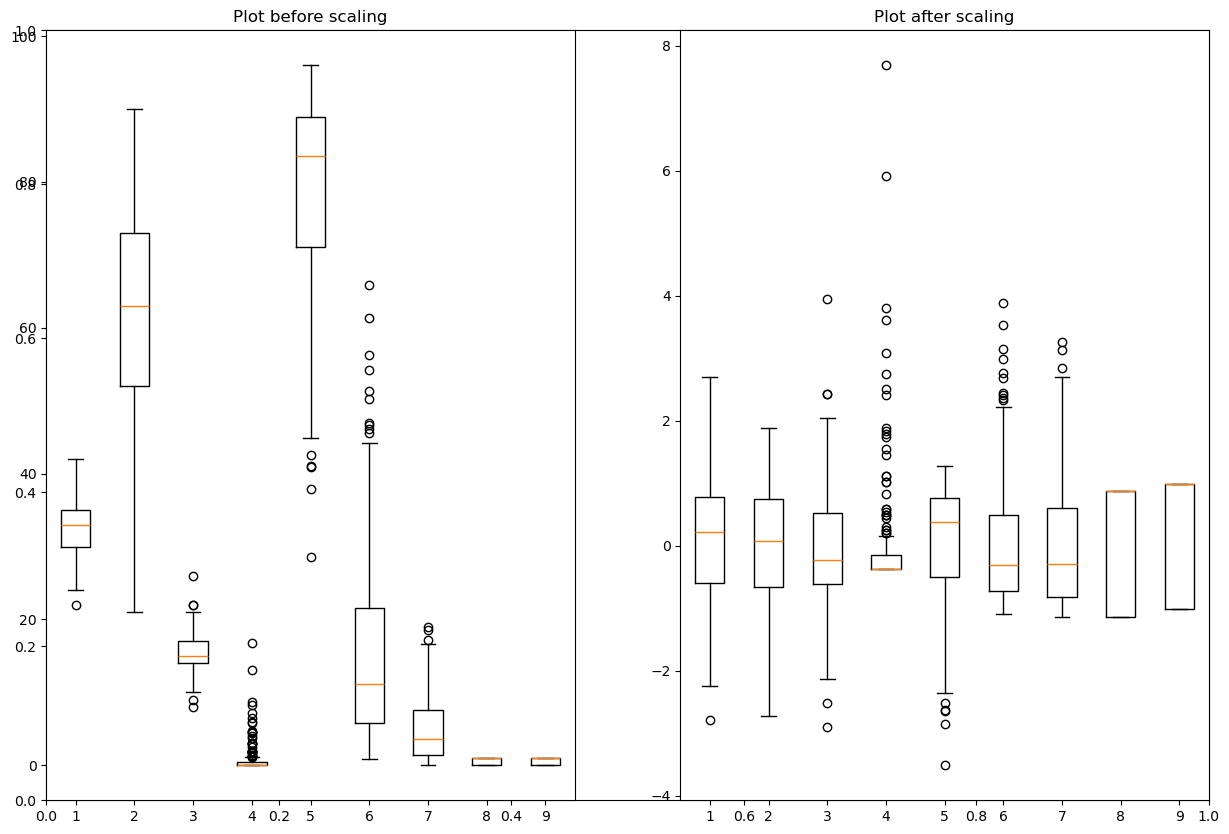

In [196]:
plt.subplots(figsize=(15,10))

# First subplot (before scaling)
plt.subplot(1,2,1)
plt.boxplot(x=X_train)
plt.title("Plot before scaling")

# Second subplot (after scaling)
plt.subplot(1,2,2)
plt.boxplot(x=X_train_scaled)
plt.title("Plot after scaling")

plt.show()


In [206]:
##### linear regression model

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
linearg=LinearRegression()
linearg.fit(X_train_scaled,y_train)

y_pred=linearg.predict(X_test_scaled)

mea=mean_absolute_error(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)

score=r2_score(y_test,y_pred)

mea,mse,score

(0.5049978694165654, 0.5882990110708642, 0.9805895859259883)

In [208]:
### lasso regression
##### linear regression model
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
lasso=Lasso()
lasso.fit(X_train_scaled,y_train)

y_pred=lasso.predict(X_test_scaled)

mea=mean_absolute_error(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)


score=r2_score(y_test,y_pred)

mea,mse,score



(1.0093958923873405, 1.7260423250231411, 0.9430507350726564)

In [209]:
### ridge regression
##### linear regression model
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)

y_pred=ridge.predict(X_test_scaled)

mea=mean_absolute_error(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)


score=r2_score(y_test,y_pred)

mea,mse,score



(0.519204832584481, 0.6029616070548663, 0.9801058063273599)

In [210]:
### ridge regression
##### linear regression model
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
elast=ElasticNet()
elast.fit(X_train_scaled,y_train)

y_pred=elast.predict(X_test_scaled)

mea=mean_absolute_error(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)


score=r2_score(y_test,y_pred)

mea,mse,score



(1.6834416340136709, 4.009921298441002, 0.8676961352267807)

In [212]:
import pickle

pickle.dump(scaler,open('sacler.pkl','wb'))

pickle.dump(scaler,open('ridge.pkl','wb'))